# Assignment 5: Estimating Optical Flow with FlowNet 

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
# Enable autoreloading if import packages are changed
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import matplotlib.pyplot as plt

from eval import AEPE
from color import flow_visualize
from inout import readTensor, imwrite, read

In [4]:
gt_flow = readTensor('data/Sintel.flo')
noise = torch.randn_like(gt_flow)
noise.shape

torch.Size([2, 436, 1024])

## Part 1 Q1: Evaluation of Optical Flow

aepe=1.254


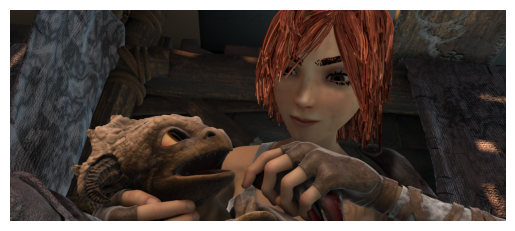

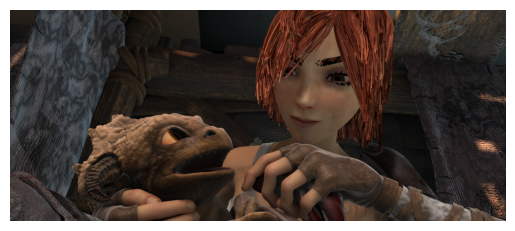

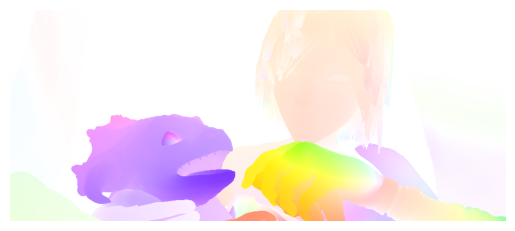

In [5]:
# 
# Please edit the file eval.py to solve the question and use this code for testing
#

image1 = read('data/Sintel1.png')
image2 = read('data/Sintel2.png')
gt_flow = readTensor('data/Sintel.flo')

# We add noise to the GT flow to simulate an error
noise = torch.randn_like(gt_flow)

# Compute and print the error: 
aepe = AEPE(gt_flow, gt_flow + noise)
print(f"{aepe=:.3f}")

# Visualize the gt flow 
coloured_flow = flow_visualize(gt_flow, 7)

# Write to file and plot
imwrite('out/sintel_flow_coded_gt.png', coloured_flow)
plt.imshow(image1)
plt.axis('off')
plt.show()
plt.imshow(image2)
plt.axis('off')
plt.show()
plt.imshow(coloured_flow)
plt.axis('off')
plt.show()

# Part 2: Variational Optical Flow

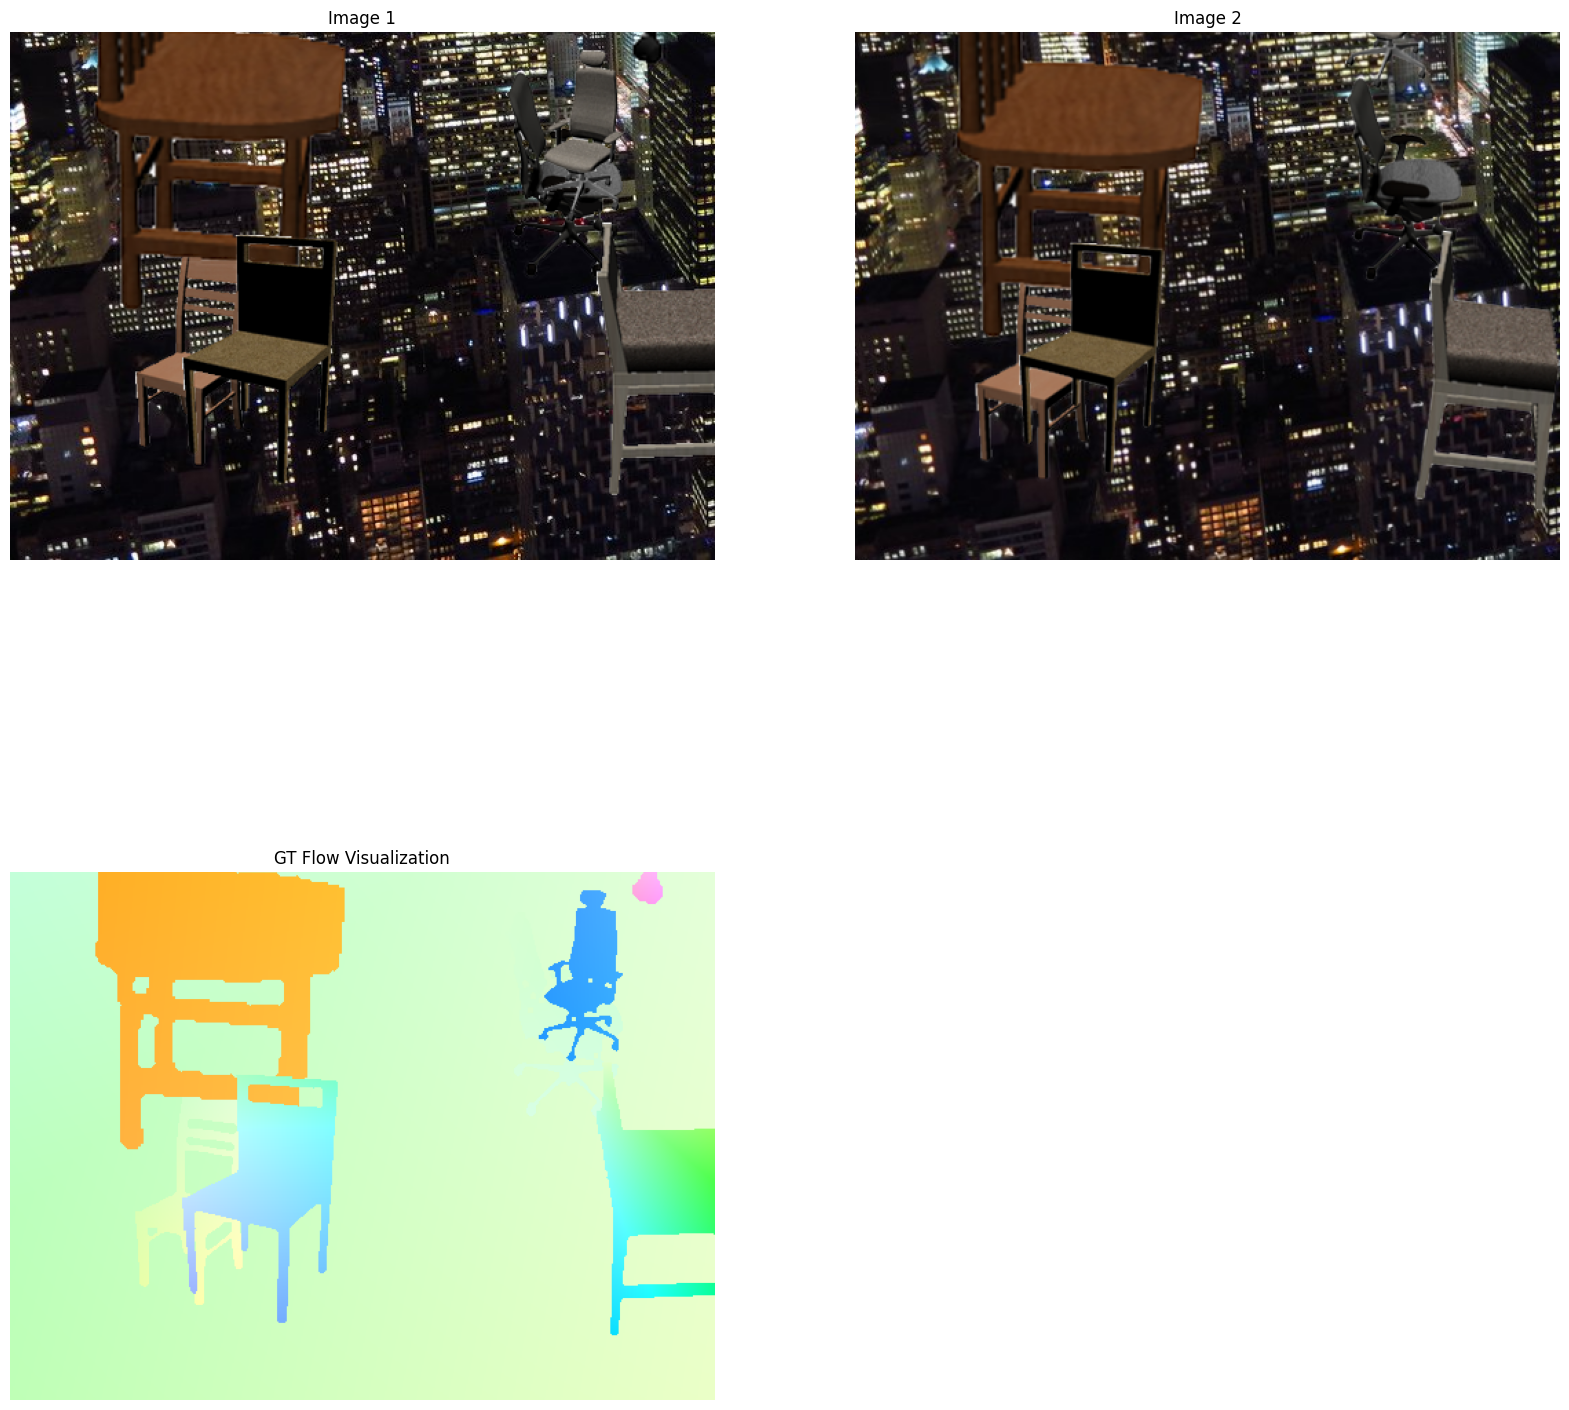

In [6]:
import subprocess

# Read images and gt flow
image1 = read('data/image1.png')
image2 = read('data/image2.png')
gt_flow = readTensor('data/flow.flo')

# Visualize flow
colored_flow = flow_visualize(gt_flow, 30)
imwrite('out/chair_flow_coded_gt.png', colored_flow)

# Plot everything
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

ax[0,0].set_title("Image 1")
ax[0,0].imshow(image1)
ax[0,0].axis('off')

ax[0,1].set_title("Image 2")
ax[0,1].imshow(image2)
ax[0,1].axis('off')

ax[1,0].set_title("GT Flow Visualization")
ax[1,0].imshow(colored_flow)
ax[1,0].axis('off')

ax[1,1].remove() 

plt.show()

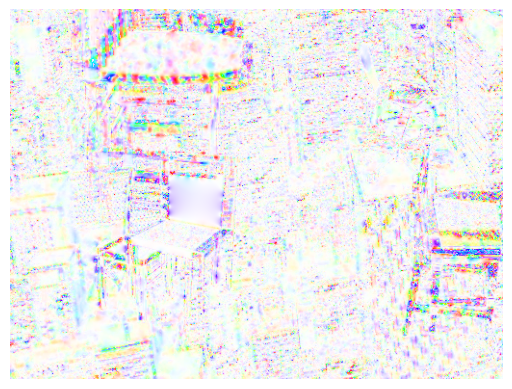

Horn an Schunck AEPE: 11.595


In [7]:
# Run Horn and Schunck
import subprocess
import os

################################################# windows ################################################################
# Get the current working directory
script_directory = os.getcwd()

# Specify the relative path to the Horn and Schunck executable
hornschunck_executable = os.path.join(script_directory, 'variational', 'hornschunck')

# Run Horn and Schunck
subprocess.call(['wsl', f'{hornschunck_executable} data/image1.ppm data/image2.ppm out/hornschunck.flo 1000 1'])
#############################################################################################################################

# Uncomment for Linux
#subprocess.call(['variational/hornschunck', 'data/image1.ppm', 'data/image2.ppm', 'out/hornschunck.flo', '1000', '1']) 

hs = readTensor('out/hornschunck.flo')

hornschunck_flow = flow_visualize(hs, 30)
imwrite('out/hornschunck.png', hornschunck_flow)
plt.imshow(hornschunck_flow)
plt.axis('off')
plt.show()

HornSchunck_AEPE = AEPE(hs, gt_flow)
print(f"Horn an Schunck AEPE: {HornSchunck_AEPE:.3f}")


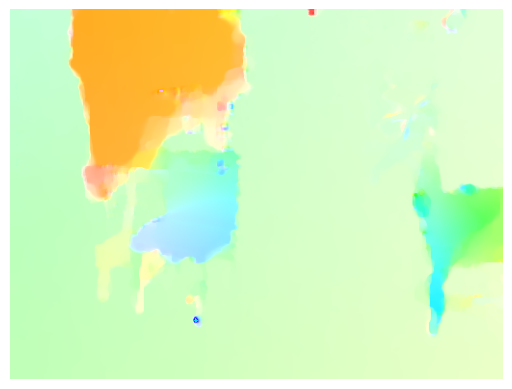

LODF AEPE: 3.428


In [8]:
# Run LDOF

################################################# windows ################################################################
# Get the current working directory
script_directory = os.getcwd()

# Specify the relative path to the Horn and Schunck executable
hornschunck_executable = os.path.join(script_directory, 'variational', 'ldof')

# Run Horn and Schunck
subprocess.call(['wsl', f'{hornschunck_executable} data/image1.ppm data/image2.ppm out/ldof.flo'])
#############################################################################################################################

# Uncomment for Linux
#subprocess.call(['variational/ldof', 'data/image1.ppm', 'data/image2.ppm', 'out/ldof.flo'])
ldof = readTensor('out/ldof.flo')
ldof_flow = flow_visualize(ldof, 30)
imwrite('out/ldof.png', ldof_flow)
plt.imshow(ldof_flow)
plt.axis('off')
plt.show()

LDOF_AEPE = AEPE(ldof, gt_flow)
print(f"LODF AEPE: {LDOF_AEPE:.3f}")


    ######################################################################################################
    # Part2 Q1) Inspect the flow fields and reason about their qualities 
    ######################################################################################################

    # ***** START OF YOUR ANSWER (DO NOT DELETE/MODIFY THIS LINE)*****

    # ***** END OF YOUR ANSWER (DO NOT DELETE/MODIFY THIS LINE)*****

# Part 3: Optical Flow with Deep Learning

In [9]:
import torch
from wrapper import ModelWrapper
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu



x6_1.shape torch.Size([1, 1024, 6, 8])
up_conv5.shape torch.Size([1, 512, 12, 16])
upsampled_flow_5.shape torch.Size([1, 2, 6, 8])
upsampled_flow_5.shape torch.Size([1, 2, 12, 16])

x5_1.shape torch.Size([1, 512, 12, 16])
merged_5.shape torch.Size([1, 1026, 12, 16])
up_conv4.shape torch.Size([1, 256, 24, 32])
flow_4.shape torch.Size([1, 2, 12, 16])
upsampled_flow_4.shape torch.Size([1, 2, 24, 32])

x4_1.shape torch.Size([1, 512, 24, 32])
merged_4.shape torch.Size([1, 770, 24, 32])
flow_3.shape torch.Size([1, 2, 24, 32])
upsampled_flow_3.shape torch.Size([1, 2, 48, 64])
up_conv3.shape torch.Size([1, 128, 48, 64])

x3_1.shape torch.Size([1, 256, 48, 64])
merged_3.shape torch.Size([1, 386, 48, 64])
flow_2.shape torch.Size([1, 2, 48, 64])
upsampled_flow_2.shape torch.Size([1, 2, 96, 128])
up_conv2.shape torch.Size([1, 64, 96, 128])

x_2a.shape torch.Size([1, 128, 96, 128])
merged_2.shape torch.Size([1, 194, 96, 128])
flow_1.shape torch.Size([1, 2, 96, 128])


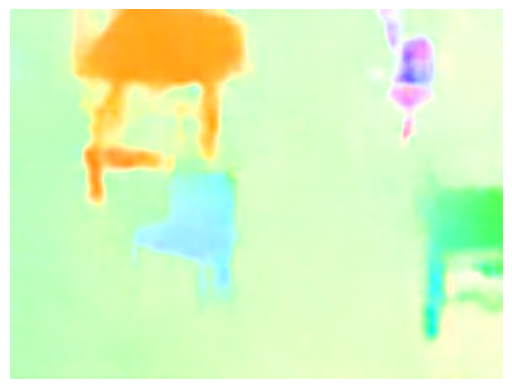

FlowNetS AEPE: 3.883


In [10]:
# Initialize the model wrapper
model = ModelWrapper(device=device)

# Load FlowNetS and evaluate
model.load_net('checkpoints/FlowNetS.pth')
flow = model.eval(image1, image2)

# Visualized colored flow 
colored_flow = flow_visualize(flow.detach(), 30)
imwrite('out/flownets.png', colored_flow)
plt.imshow(colored_flow)
plt.axis('off')
plt.show()

# Compute APEE 
flownets_AEPE = AEPE(flow, gt_flow)
print(f"FlowNetS AEPE: {flownets_AEPE:.3f}")

In [ ]:
import torch
from torchvision.transforms import ToTensor
from PIL import Image
from models.FlowNetC import FlowNetC

image1_path = './data/image1.ppm'
image2_path = './data/image2.ppm'
image1 = ToTensor()(Image.open(image1_path)).unsqueeze(0)
image2 = ToTensor()(Image.open(image2_path)).unsqueeze(0)
print(image1.shape)

# Initialize the model and set the device
model = FlowNetC()

# Perform the forward pass
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    flow_field = model.forward(image1, image2)

# The 'flow_field' variable now contains the predicted optical flow.
# You can further process or visualize the results as needed.


In [12]:
flow_field.shape

torch.Size([1, 2, 384, 512])

# Task 4: Optical Flow with FlowNetC

cpu
image1.shape torch.Size([1, 3, 384, 512])
conv3_output_1.shape torch.Size([1, 256, 48, 64])
torch.Size([1, 473, 48, 64])
torch.Size([1, 256, 48, 64])
torch.Size([1, 512, 24, 32])
torch.Size([1, 512, 24, 32])
torch.Size([1, 512, 12, 16])
torch.Size([1, 512, 12, 16])
torch.Size([1, 1024, 6, 8])
torch.Size([1, 1024, 6, 8])

x6_1.shape torch.Size([1, 1024, 6, 8])
up_conv5.shape torch.Size([1, 512, 12, 16])
upsampled_flow_5.shape torch.Size([1, 2, 6, 8])
upsampled_flow_5.shape torch.Size([1, 2, 12, 16])

x5_1.shape torch.Size([1, 512, 12, 16])
merged_5.shape torch.Size([1, 1026, 12, 16])
up_conv4.shape torch.Size([1, 256, 24, 32])
flow_4.shape torch.Size([1, 2, 12, 16])
upsampled_flow_4.shape torch.Size([1, 2, 24, 32])

x4_1.shape torch.Size([1, 512, 24, 32])
merged_4.shape torch.Size([1, 770, 24, 32])
flow_3.shape torch.Size([1, 2, 24, 32])
upsampled_flow_3.shape torch.Size([1, 2, 48, 64])
up_conv3.shape torch.Size([1, 128, 48, 64])

x3_1.shape torch.Size([1, 256, 48, 64])
merged_3.sha

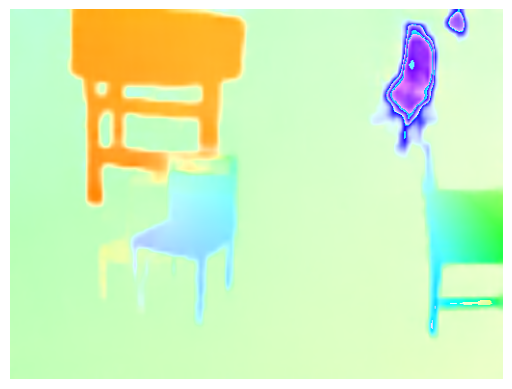

FlowNetS AEPE: 1.991


In [13]:
# Initialize the model wrapper
import torch
from wrapper import ModelWrapper
from inout import readTensor, imwrite, read
import matplotlib.pyplot as plt

from eval import AEPE
from color import flow_visualize
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
print(device)

model = ModelWrapper(device=device)
image1 = read('data/image1.png')
image2 = read('data/image2.png')
# Load FlowNetC
model.load_net('checkpoints/FlowNetC.pth')
# state_dict = torch.load('checkpoints/FlowNetC.pth')
# print(state_dict.keys())
# if 'state_dict' in state_dict:
#     state_dict = state_dict['state_dict']
#     #print(state_dict.shape)
#     for key, value in state_dict.items():
#         print(f"Key: {key}, Shape: {value.shape}")

# else:
#     state_dict = state_dict
# Test if your implementation of the correlation layer is correct
model.test_correlation(image1, image2, 'data/correlation_layer_output.pth')

# Evaluate
flow = model.eval(image1, image2)

# Visualized colored flow 
colored_flow = flow_visualize(flow.detach(), 30)
imwrite('out/flownetc.png', colored_flow)
plt.imshow(colored_flow)
plt.axis('off')
plt.show()

# Compute APEE 
flownetc_AEPE = AEPE(flow, gt_flow)
print(f"FlowNetS AEPE: {flownetc_AEPE:.3f}")

# Load FlowNetC
model.load_net('checkpoints/FlowNetC.pth')

In [15]:
Y_coordinates, X_coordinates = torch.meshgrid([torch.arange(0, 2 * 8 + 1,2),
                                           torch.arange(0, 2 * 8 + 1,2)])
print(X_coordinates)

tensor([[ 0,  2,  4,  6,  8, 10, 12, 14, 16],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16]])
